<div class="alert alert-block alert-success" align = center>
    <h1>SUPPORT VECTOR REGRESSOR</h1>
</div>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score

In [2]:
def split(dataframe):
    
    # Si toglie la colonna da predire
    X = dataframe.drop(columns=['Sale_Price'], axis =1)

    # Si isola la colonna da predire
    y = dataframe['Sale_Price']

    X_train_80, X_test, y_train_80, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)
    
    return X_train_80, X_test, y_train_80, y_test

In [3]:
def divide(dataframe):
    
    # Si separano le feature dal prezzo
    X_train = dataframe.drop(columns = ['Sale_Price'], axis = 1)
    
    y_train = dataframe['Sale_Price']
    
    return X_train, y_train

Si importa il dataset sporco con outliers.

In [4]:
df = pd.read_csv('dataset_enc.csv')

In [5]:
X_train_80, X_test, y_train_80, y_test = split(df)

Si importano il training-set e il test-set del dataset sporco ma senza outliers.

In [6]:
df_train_wo_out = pd.read_csv('training_wo_outliers.csv')

In [7]:
X_train_wo_out, y_train_wo_out = divide(df_train_wo_out)

Si importa il training-set pulito con outliers su cui è stata applicata la tecnica dell'RFECV con gli outliers.

In [8]:
df_clean_train = pd.read_csv('df_train_RFECV.csv')

In [9]:
X_clean_train_80, y_clean_train_80 = divide(df_clean_train)

Si importa il training-set pulito ma senza outliers su cui è stata applicata RFECV.

In [10]:
df_clean_train_wo_out = pd.read_csv('df_train_wo_out_RFECV.csv')

In [11]:
X_clean_train_wo_out, y_clean_train_wo_out = divide(df_clean_train_wo_out)

E infine il test-set pulito su cui è stata applicata RFECV.

In [12]:
df_clean_test = pd.read_csv('df_test_RFECV.csv')

In [13]:
X_clean_test, y_clean_test = divide(df_clean_test)

### Funzione che implementa il SVR con c = 1.0

In [14]:
def svr_base(X_train, X_test, y_train, y_test):
    
    # Array per salvarsi i risultati ottenuti
    MAE = []
    
    # Parametro base di regolarizzazione
    c = 1.0
    
    # Creazione modello
    model = SVR(C = c)
    model.fit(X_train, y_train)
   
    # Calcolo dell'errore assoluto per il test-set
    y_pred_test = model.predict(X_test)
    MAE = mean_absolute_error(y_true = y_test, y_pred = y_pred_test)
    
    # Grafico y reali vs y predette
    plt.scatter(y_test, y_pred_test)
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    
    # Calcolo dello score
    score = r2_score(y_test, y_pred_test)

    return MAE, score

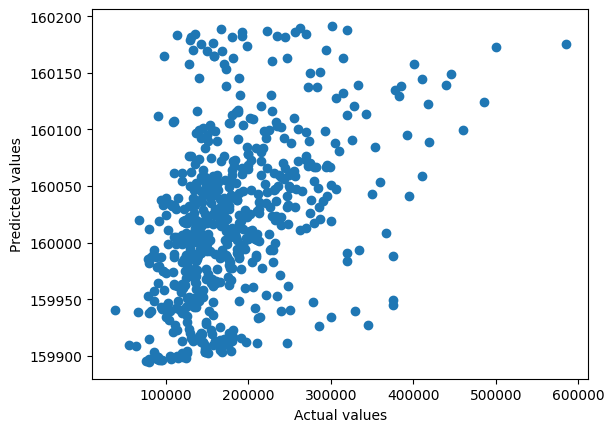

In [15]:
MAE_test_base, score = svr_base(X_train_80, X_test, y_train_80, y_test)

In [16]:
print("Errore: ", MAE_test_base)
print("Score: ", score)

Errore:  53953.64421104376
Score:  -0.0819357153873721


Si prova tale modello base sul dataset sporco ma senza outliers.

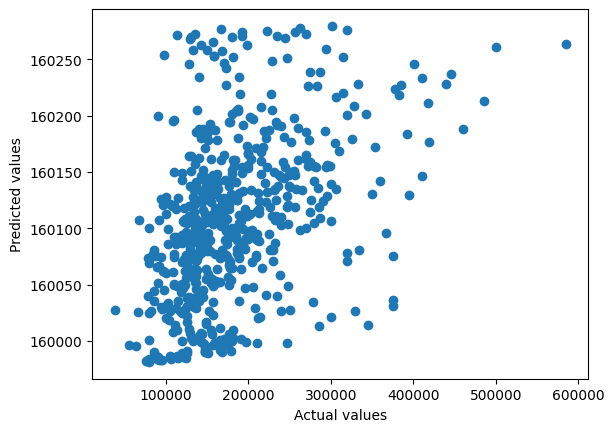

In [17]:
MAE_test_base_wo_out, score_wo_out = svr_base(X_train_wo_out, X_test, y_train_wo_out, y_test)

In [18]:
print("Errore: ", MAE_test_base_wo_out)
print("Score: ", score_wo_out)

Errore:  53951.36180819523
Score:  -0.0812569494522577


Ora si prova anche sul datset pulito con e senza outliers.

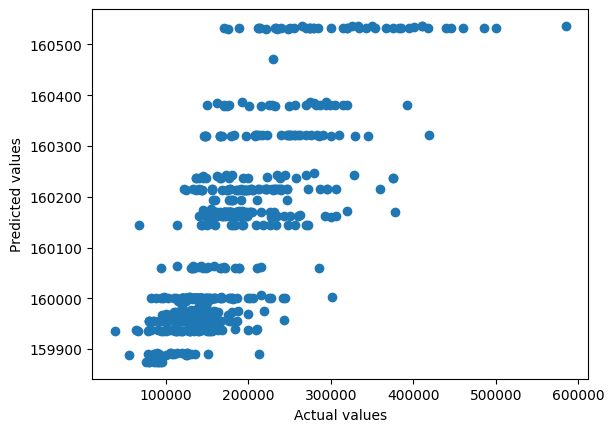

In [19]:
MAE_test_clean_base, score_clean = svr_base(X_clean_train_80, X_clean_test, y_clean_train_80, y_clean_test)

In [20]:
print("Errore: ", MAE_test_clean_base)
print("Score: ", score_clean)

Errore:  53854.749244615006
Score:  -0.07826561477306582


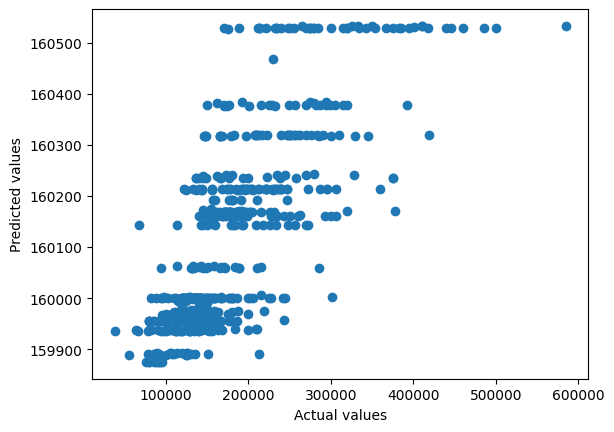

In [21]:
MAE_test_clean_base_wo_out, score_clean_wo_out = svr_base(X_clean_train_wo_out, X_clean_test, y_clean_train_wo_out, y_clean_test)

In [22]:
print("Errore: ", MAE_test_clean_base_wo_out)
print("Score: ", score_clean)

Errore:  53855.49683585106
Score:  -0.07826561477306582


<div class="alert alert-block alert-warning">
<b>Considerazioni</b>
</div>

Per queste considerazioni si noti che il parametro c è uguale a 1 e come misura di confronto si utilizza l'errore e non lo score dato che esso è negativo. Ciò significa che non si predice in maniera corretta.

Facendo un primo confronto tra il dataset iniziale con e senza outliers si nota che nel secondo caso vi è un miglioramento nell'errore, anche se di poco:
+ Dataset con outliers:     Errore:  53953.64421104376

+ Dataset senza outliers:   Errore:  53951.36180819523

Per quanto riguarda il dataset pulito con e senza gli outliers si ottiene lo stesso risultato dei modelli precedenti, ovvero il dataset pulito con gli outliers è lievemente migliore dello stesso senza outliers:
+ Dataset con outliers:     Errore: 53854.749244615006

+ Dataset senza outliers:   Errore: 53855.49683585106

In generale il dataset pulito performa meglio rispetto al dataset sporco evidenziando ancora una volta come il lavoro di pulizia abbia portato a risultati più soddisfacenti.

> Split per Corss-Validation

Si dividono i training-set per poter effettuare Cross-Validation

In [23]:
def split_cross(X_train, y_train):
    
    X_train_new, X_valid, y_train_new, y_valid  = train_test_split(X_train, y_train, test_size = 0.25, random_state = 3)
    
    return X_train_new, X_valid, y_train_new, y_valid

In [24]:
X_train_80, X_valid, y_train_80, y_valid = split_cross(X_train_80, y_train_80)

In [25]:
X_train_wo_out, X_valid_wo_out, y_train_wo_out, y_valid_wo_out = split_cross(X_train_wo_out, y_train_wo_out)

In [26]:
X_clean_train_80, X_clean_valid, y_clean_train_80, y_clean_valid = split_cross(X_clean_train_80, y_clean_train_80)

In [27]:
X_clean_train_wo_out, X_clean_valid_wo_out, y_clean_train_wo_out, y_clean_valid_wo_out = split_cross(X_clean_train_wo_out, y_clean_train_wo_out)

### Funzione che implementa la ricerca del miglior parametro per c

In [28]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def cv_svr(X_train, X_valid, X_test, y_train, y_valid, y_test, c= [1.0]):
    
    # Array per salvarsi i risultati ottenuti
    MAE = []
    MAE_plot = []
    
    # ------------------------------------------------------------------
    
    # Ciclo for per vedere i cambiamenti dell'mae in base al parametro di regolarizzazione
    for i in c:
        
        # Creazione modello
        model = SVR(C = i)
        model.fit(X_train, y_train)
        
        # Calcolo dell'errore (mae) sul training-set
        y_pred_train = model.predict(X_train)
        MAE_train = mean_absolute_error(y_true = y_train, y_pred = y_pred_train)
        
        # Calcolo dell'errore (mae) sul valid-set
        y_pred_valid = model.predict(X_valid)
        MAE_valid = mean_absolute_error(y_true = y_valid, y_pred = y_pred_valid)
        
        # L'array mae contiene elementi che a loro volta sono array di 3 elementi: 
        # parametro di regolarizzazione, errore sul train e errore sul test
        MAE_plot += [[i, MAE_train, MAE_valid]]
        
    # ------------------------------------------------------------------
    
    # Si cerca l'errore migliore (il più piccolo)
    minimum_error = MAE_plot[0][2]
    best_c = MAE_plot[0][0]
    
    for i in range(len(MAE_plot)):
        if(minimum_error > MAE_plot[i][2]):
            minimum_error = MAE_plot[i][2]
            best_c = MAE_plot[i][0]

    # Si crea un nuovo modello con il parametro di regolarizzazione associato all'errore migliore
    best_model = SVR(C = best_c)
    best_model.fit(X_train, y_train)
    
    # Calcolo dell'errore assoluto sul test-set
    y_pred_test = best_model.predict(X_test)
    MAE_test = mean_absolute_error(y_true = y_test, y_pred = y_pred_test)
    
    # L'array best_n_estimators contiene elementi che a loro volta sono array di 2 elementi: 
    # numero di vicini, errore assoluto sul test
    MAE = [best_c, MAE_test]

    MAE_plot = np.array(MAE_plot)
    
    # Grafico y reali vs y predette
    plt.scatter(y_test, y_pred_test)
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')

    # Grafico
    fig, ax = plt.subplots()
    ax.plot(MAE_plot[:,0], MAE_plot[:,1], "x:", label = "Train")
    ax.plot(MAE_plot[:,0], MAE_plot[:,2], "s-", label = "Valid")
    plt.xlabel("Parameter c")
    plt.ylabel("MAE")
    ax.legend()
    ax.grid()
    
    # Calcolo dello score
    score = r2_score(y_test, y_pred_test)

    #dataframe per il confronto finale dei prezzi predetti
    dataframe_diff = pd.DataFrame({'Actual Value' : y_test, 'Predicted Value' : y_pred_test, 'Difference' : abs(y_test - y_pred_test)})
    

    return MAE, score, dataframe_diff

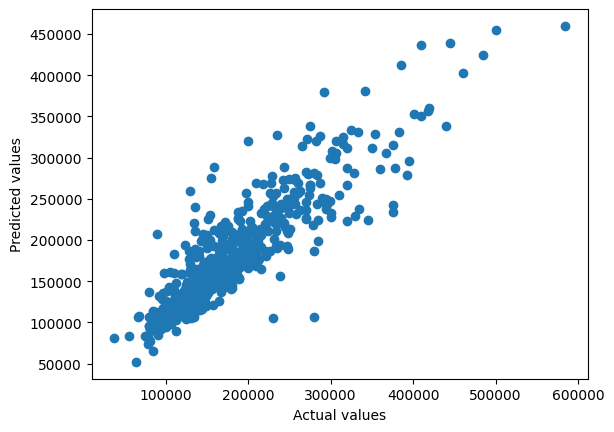

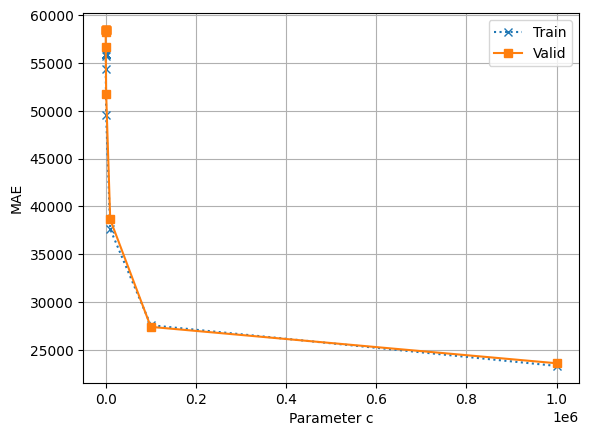

In [29]:
c = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0]
MAE_test, score, dataframe_confronto = cv_svr(X_train_80, X_valid, X_test, y_train_80, y_valid, y_test, c)

dataframe da esportare per il confronto finale

In [30]:
dataframe_confronto = pd.concat([X_valid, dataframe_confronto], axis = 1)
dataframe_confronto.to_csv(r'df_confronto_SVR.csv', index = False)

In [31]:
print("Migliore c: ", MAE_test[0])
print("Errore: ", MAE_test[1])
print("Score: ", score)

Migliore c:  1000000.0
Errore:  23491.251075901608
Score:  0.7865024461719692


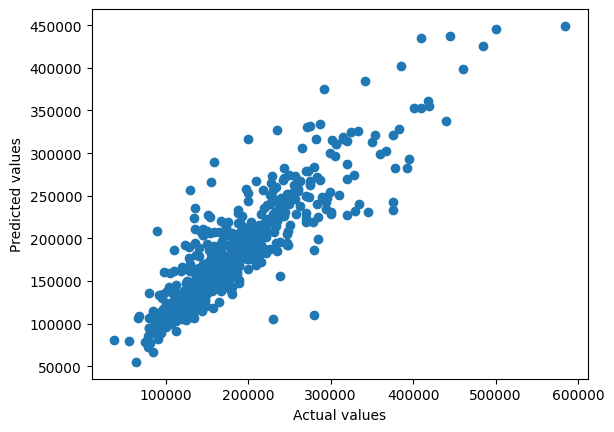

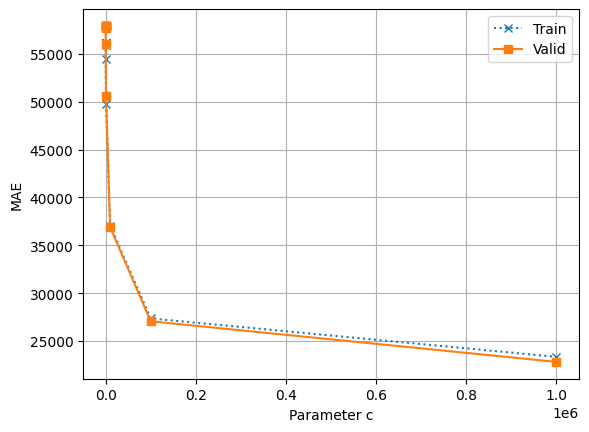

In [32]:
c = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0]
MAE_test_wo_out, score_wo_out, dataframe_diff = cv_svr(X_train_wo_out, X_valid_wo_out, X_test, y_train_wo_out, y_valid_wo_out, y_test, c)

In [33]:
print("Migliore c: ", MAE_test_wo_out[0])
print("Errore: ", MAE_test_wo_out[1])
print("Score: ", score_wo_out)

Migliore c:  1000000.0
Errore:  23238.067279663803
Score:  0.7895084117488712


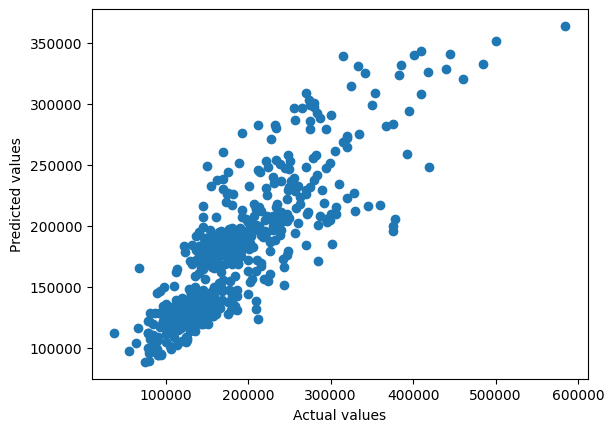

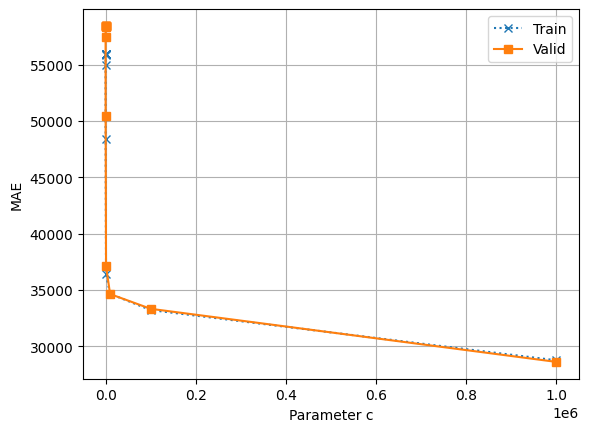

In [34]:
c = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0]
MAE_test_clean, score_clean, dataframe_diff = cv_svr(X_clean_train_80, X_clean_valid, X_clean_test, y_clean_train_80, y_clean_valid, y_clean_test, c)

In [35]:
print("Migliore c: ", MAE_test_clean[0])
print("Errore: ", MAE_test_clean[1])
print("Score: ", score_clean)

Migliore c:  1000000.0
Errore:  27844.221210788917
Score:  0.6985486346487232


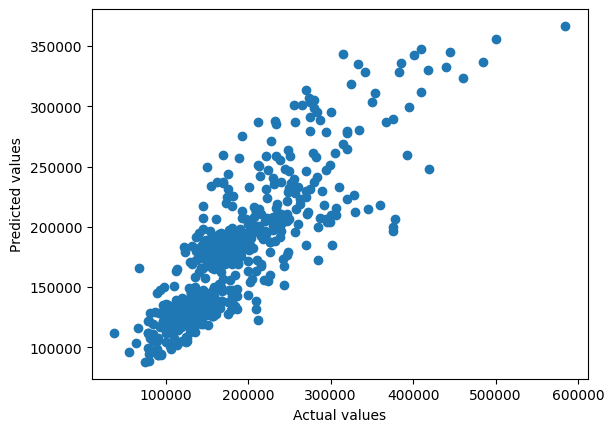

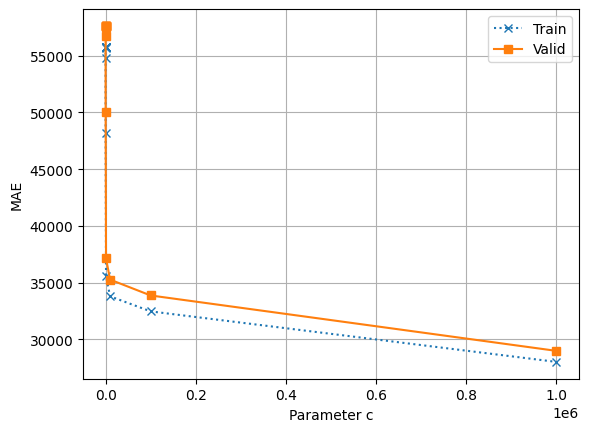

In [36]:
c = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0]
MAE_test_clean_wo_out, score_clean_wo_out, dataframe_diff = cv_svr(X_clean_train_wo_out, X_clean_valid_wo_out, X_clean_test, y_clean_train_wo_out, y_clean_valid_wo_out, y_clean_test, c)

In [37]:
print("Migliore c: ", MAE_test_clean_wo_out[0])
print("Errore: ", MAE_test_clean_wo_out[1])
print("Score: ", score_clean_wo_out)

Migliore c:  1000000.0
Errore:  27827.679029307652
Score:  0.7015693818974559


<div class="alert alert-block alert-warning">
<b>Considerazioni finali</b>
</div>

Significato del parametro C:

Rappresenta il parametro di regolarizzazione e la forza della regolarizzazione è inversamente proporzionale a C, in altre parole, serve come grado di importanza che viene attribuito alle predizioni errate: più è alto tale valore minore sarà il numero di predizione errate e viceversa.

In queste considerazioni non verrà citato il modello base perché compreso nella valutazione per la ricerca del parametro c migliore.

In tutti i casi si ha che il risultato migliore è quando c è pari a 1000000.0.
Il dataset più performante è il dataset sporco senza gli outliers con un'errore pari a 23238.067279663803 e uno score pari a 0.7895084117488712.

In ogni caso si vuole far notare che, al contrario del Knn, il dataset pulito senza outliers abbia delle prestazioni migliori rispetto allo stesso con gli outliers per gli stessi valori del parametro c.